In [2]:
%matplotlib inline

from matplotlib import rc
import numpy as np
import pandas as pd

rc('font', family='Malgun Gothic')  # 윈도우
# rc('font', family='AppleGothic')  # 맥

In [4]:
CCTV_Seoul = pd.read_csv('./data/pinkwink/01. CCTV_in_Seoul.csv')
print(CCTV_Seoul.shape)
CCTV_Seoul.head()

(25, 6)


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [ ]:
# 한 번에 다 바꾸기
# CCTV_Seoul.columns = ['구별', '소계', '2013년도 이전', '2014년도', '2015년도', '2016년도']

In [13]:
CCTV_Seoul = CCTV_Seoul.rename(
    columns={'기관명': '구별'}
)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [21]:
pop_Seoul = pd.read_excel(
    './data/pinkwink/01. population_in_Seoul.xls',
    header=2,
    usecols = 'B, D, G, J, N')
    
# pop_Seoul = pop_Seoul.iloc[:, [1, 3, 6]]

pop_Seoul.columns = [
    '구별', '인구수', '한국인', '외국인', '고령자',
]

print(pop_Seoul.shape)
pop_Seoul.head()

(27, 5)


,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [31]:
# pop_Seoul.index = pd.date_range('20190101', periods=27, freq='D')

pop_Seoul.index = range(27)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [39]:
pop_Seoul.values  # numpy의 ndarray

array([['합계', 10197604.0, 9926968.0, 270636.0, 1321458.0],
       ['종로구', 162820.0, 153589.0, 9231.0, 25425.0],
       ['중구', 133240.0, 124312.0, 8928.0, 20764.0],
       ['용산구', 244203.0, 229456.0, 14747.0, 36231.0],
       ['성동구', 311244.0, 303380.0, 7864.0, 39997.0],
       ['광진구', 372164.0, 357211.0, 14953.0, 42214.0],
       ['동대문구', 369496.0, 354079.0, 15417.0, 54173.0],
       ['중랑구', 414503.0, 409882.0, 4621.0, 56774.0],
       ['성북구', 461260.0, 449773.0, 11487.0, 64692.0],
       ['강북구', 330192.0, 326686.0, 3506.0, 54813.0],
       ['도봉구', 348646.0, 346629.0, 2017.0, 51312.0],
       ['노원구', 569384.0, 565565.0, 3819.0, 71941.0],
       ['은평구', 494388.0, 489943.0, 4445.0, 72334.0],
       ['서대문구', 327163.0, 314982.0, 12181.0, 48161.0],
       ['마포구', 389649.0, 378566.0, 11083.0, 48765.0],
       ['양천구', 479978.0, 475949.0, 4029.0, 52975.0],
       ['강서구', 603772.0, 597248.0, 6524.0, 72548.0],
       ['구로구', 447874.0, 416487.0, 31387.0, 56833.0],
       ['금천구', 255082.0, 236353.

In [42]:
CCTV_Seoul.sort_values('소계').head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [43]:
CCTV_Seoul.sort_values('소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [54]:
최근3년 = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년'])
최근증가율 = 100 * 최근3년 / CCTV_Seoul['2013년도 이전']
CCTV_Seoul['최근증가율'] = 최근증가율
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


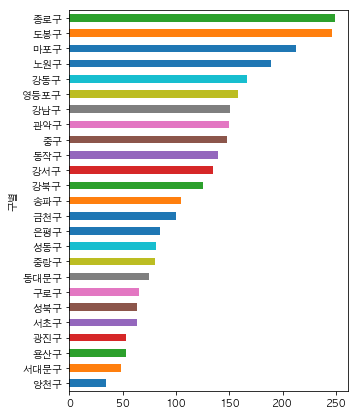

In [75]:
CCTV_Seoul.set_index('구별')['최근증가율'].sort_values(ascending=True).plot(
    kind='barh', figsize=(5, 7))

In [80]:
"abcdefg"[1:-1]

'bcdef'

In [81]:
# pop_Seoul.drop([0, 26], inplace=True)

pop_Seoul = pop_Seoul.iloc[1:-1]
print(pop_Seoul.shape)
pop_Seoul.head()

(25, 5)


,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [87]:
mask = pop_Seoul['인구수'] == pop_Seoul['한국인'] + pop_Seoul['외국인']
pop_Seoul[mask].head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [95]:
pop_Seoul['외국인비율'] = 100 * pop_Seoul['외국인'] / pop_Seoul['인구수']
pop_Seoul['고령자비율'] = 100 * pop_Seoul['고령자'] / pop_Seoul['인구수']
pop_Seoul[['외국인비율', '고령자비율']].head()

/Users/allieus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/allieus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,외국인비율,고령자비율
1,5.669451,15.615404
2,6.700690,15.583909
3,6.038828,14.836427
4,2.526635,12.850689
5,4.017852,11.342849


In [96]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [97]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [99]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
print(data_result.shape)
data_result.head()

(25, 13)


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [104]:
names = ['2013년도 이전', '2014년', '2015년', '2016년']
data_result.drop(names, axis='columns', inplace=True)
print(data_result.shape)
data_result.head()

(25, 9)


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [107]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [108]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [109]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [110]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [112]:
data_result.sort_values('소계', ascending=False).head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
동대문구,1294,74.766355,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [113]:
data_result.sort_values('인구수', ascending=False).head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


# matplotlib으로 직접 그려보기

In [114]:
import matplotlib.pyplot as plt

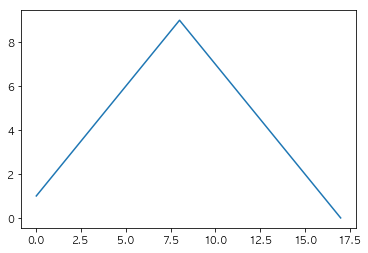

In [115]:
plt.figure()
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
plt.show()

In [117]:
list(range(1, 10, 2))

[1, 3, 5, 7, 9]

In [131]:
t = np.arange(0, 12, 0.01)

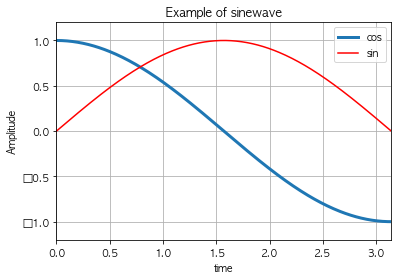

In [139]:
plt.figure()#figsize=(10, 6)) 
plt.grid()
plt.plot(t, np.cos(t), lw=3, label='cos')
plt.plot(t, np.sin(t), 'r', label='sin')
plt.legend()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기|
plt.title('Example of sinewave')

plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)

plt.show()

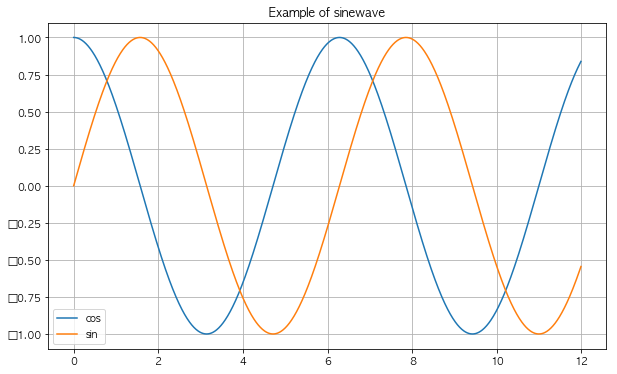

In [148]:
t = np.arange(0, 12, 0.01)

df = pd.DataFrame()
df['cos'] = pd.Series(np.cos(t), index=t)
df['sin'] = pd.Series(np.sin(t), index=t)

df.plot(grid=True, title='Example of sinewave', figsize=(10, 6))